#  <span style="color:#cc416d">Estádistica de POZOS 1997</span>

este archivo salio de compilar los años en el excel: 2007_TODA LA PIEZOMETRÍA DEPURADO COLIMA
en la ruta: C:\Proyectos\2025\Armeria\xls

In [1]:
import glob
import rasterio
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os, glob 
from rasterio.crs import CRS
import contextily as ctx
import seaborn as sns
from pyproj import Transformer
from matplotlib.ticker import FixedLocator

In [2]:
# 📂 Rutas
path = "C:/Proyectos/2025/Armeria/csv/sal/"
os.chdir(path)
print ("Ruta de trabajo:   " + path)
carpeta_salida = r"C:/Proyectos/2025/Armeria/csv/sal/"
print("Salidas", carpeta_salida)

Ruta de trabajo:   C:/Proyectos/2025/Armeria/csv/sal/
Salidas C:/Proyectos/2025/Armeria/csv/sal/


###  <span style="color:#cc416d">Lectura CSV</span>

In [3]:
df = pd.read_csv(os.path.join(carpeta_salida, "pozos1997_dd.csv"))
df

,No_local,lat_dd,lon_dd,elevBr_1997,NE_1997
0,510,18.905000,-104.017222,5.406,2.70
1,511,18.891111,-104.000000,5.953,2.20
2,503,18.935556,-104.016667,8.968,3.60
3,522,18.925833,-104.018056,9.372,3.80
4,550,18.913333,-103.999444,9.994,3.30
5,502,18.932778,-104.009444,10.319,4.10
6,552,18.916111,-103.912500,10.464,3.20
7,524,18.924722,-104.004167,10.591,3.90
8,549,18.910556,-103.994722,12.629,4.50
9,689,18.923333,-103.991944,12.888,4.90


###  <span style="color:#cc416d">Estádistica</span>

In [4]:
df["NE_1997"].describe()

count    47.000000
mean      7.931064
std       5.842638
min       0.350000
25%       3.550000
50%       5.700000
75%      12.050000
max      24.600000
Name: NE_1997, dtype: float64

In [5]:
# Número de filas con valor exactamente 0
num_ceros = (df["NE_1997"] == 0).sum()
print("Ceros en NE_1997:", num_ceros)


Ceros en NE_1997: 0


###  <span style="color:#cc416d">Leer SHP AOL y su proyección</span>

In [7]:
gdf_limite = gpd.read_file(r'C:/Proyectos/2025/Armeria/shapes/aol.shp')
gdf_limite.crs

<Geographic 2D CRS: EPSG:4267>
Name: NAD27
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North and central America: Antigua and Barbuda - onshore. Bahamas - onshore plus offshore over internal continental shelf only. Belize - onshore. British Virgin Islands - onshore. Canada onshore - Alberta, British Columbia, Manitoba, New Brunswick, Newfoundland and Labrador, Northwest Territories, Nova Scotia, Nunavut, Ontario, Prince Edward Island, Quebec, Saskatchewan and Yukon - plus offshore east coast. Cuba - onshore and offshore. El Salvador - onshore. Guatemala - onshore. Honduras - onshore. Panama - onshore. Puerto Rico - onshore. Mexico - onshore plus offshore east coast. Nicaragua - onshore. United States (USA) onshore and offshore - Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, Florida, Georgia, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, 

###  <span style="color:#cc416d">Por si no tuviera proyección</span>

In [ ]:
if gdf_limite.crs is None:
    # Si viniera sin CRS, lo fijamos como NAD27 explícitamente
    gdf_limite = gdf_limite.set_crs(4267)
elif gdf_limite.crs.to_epsg() != 4267:
    print(f"⚠️ Límite no está en EPSG:4267, se detectó: {gdf_limite.crs}. Continuaré, pero revisa.")
    
print("CRS límite:", gdf_limite.crs)


####  <span style="color:#cc416d">Definir proyección del *CSV, coordenadas lat y lon</span>

In [8]:
gdf_4267 = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["lon_dd"], df["lat_dd"]),
    crs="EPSG:4267"
)
print ("\U0001F40D")

🐍


####  <span style="color:#cc416d"> Reproyectar puntos (NAD27) y límite a WebMercator (3857) para usar basemap</span> 

In [9]:
gdf_pts_3857 = gdf_4267.to_crs(3857)
gdf_limite_3857 = gdf_limite.to_crs(3857)
print ("\U0001F40D")

🐍


####  <span style="color:#cc416d"> Transformer para etiquetar los ejes en grados (3857 -> 4326)</span>  

In [10]:
transformer_3857_to_4326 = Transformer.from_crs(3857, 4326, always_xy=True)
print ("\U0001F40D")

🐍


In [11]:
anios = ['NE_1997']

####  <span style="color:#cc416d">Loop por años (columna de valores)</span>   

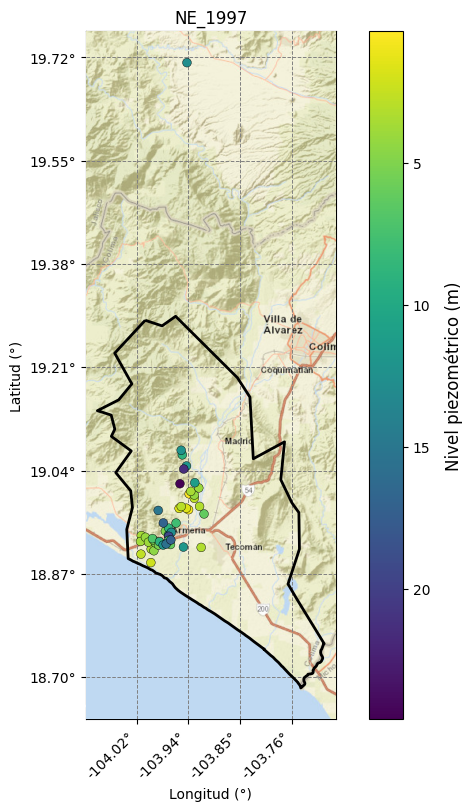

In [15]:
for anio in anios:
    col = str(anio)
    if col not in gdf_pts_3857.columns:
        continue

    fig, ax = plt.subplots(figsize=(4.5, 8), constrained_layout=True)

    # Subconjuntos
    gdf_con = gdf_pts_3857[gdf_pts_3857[col].notna() & gdf_pts_3857.geometry.notna()]
    gdf_sin = gdf_pts_3857[gdf_pts_3857[col].isna()  & gdf_pts_3857.geometry.notna()]

    # --- Bounds combinados (límite + puntos) ---
    bounds_lim = gdf_limite_3857.total_bounds  # [minx, miny, maxx, maxy]
    bounds_pts = gdf_pts_3857.total_bounds     # [minx, miny, maxx, maxy]
    
    minx = min(bounds_lim[0], bounds_pts[0])
    miny = min(bounds_lim[1], bounds_pts[1])
    maxx = max(bounds_lim[2], bounds_pts[2])
    maxy = max(bounds_lim[3], bounds_pts[3])
    
    # Padding general
    padx = (maxx - minx) * 0.05
    pady = (maxy - miny) * 0.05
    
    # Extra solo hacia el norte (arriba)
    extra_norte = (maxy - miny) * 0.25  # súbele/elimina según necesites

    # Extent antes del basemap
    ax.set_xlim(minx - padx, maxx + padx)
    ax.set_ylim(miny - pady, maxy + pady)

    # Sin dato
    if not gdf_sin.empty:
        gdf_sin.plot(ax=ax, color='lightgrey', markersize=12, label='Sin dato', zorder=20)

    # Con dato (rampa)
    if not gdf_con.empty:
        gdf_con.plot(ax=ax, column=col, cmap='viridis_r', legend=True, markersize=40, zorder=25, edgecolor="black", linewidth=0.3)

    # Recuperar la barra de color (último eje añadido a la figura)
    cbar_ax = ax.get_figure().get_axes()[-1]
    cbar_ax.set_ylabel("Nivel piezométrico (m)", fontsize=12, rotation=90, labelpad=10)
    cbar_ax.invert_yaxis()
    


    # Límite
    if not gdf_limite_3857.empty:
        gdf_limite_3857.boundary.plot(ax=ax, color='black', linewidth=2, zorder=30)

    # Basemap
    ctx.add_basemap(ax, source=ctx.providers.Esri.WorldStreetMap, crs=3857, zorder=10)
    ax.set_aspect('equal')

    # --- Ejes en grados ---
    xticks_m = ax.get_xticks()    
    yticks_m = ax.get_yticks()
    ax.yaxis.set_major_locator(FixedLocator(yticks_m))
    ax.xaxis.set_major_locator(FixedLocator(xticks_m))

    
    for label in ax.get_xticklabels():
        label.set_rotation(45)   # o 30, según veas
        label.set_horizontalalignment('right')

    if len(xticks_m) and len(yticks_m):
        y_ref = yticks_m[len(yticks_m)//2]
        x_ref = xticks_m[len(xticks_m)//2]
        xticks_deg = [transformer_3857_to_4326.transform(x, y_ref)[0] for x in xticks_m]
        yticks_deg = [transformer_3857_to_4326.transform(x_ref, y)[1] for y in yticks_m]
        ax.set_xticklabels([f"{v:.2f}°" for v in xticks_deg])
        ax.set_yticklabels([f"{v:.2f}°" for v in yticks_deg])

    # --- Dibujar líneas punteadas en las posiciones de los ticks (en metros) ---
    for x in xticks_m:
        ax.axvline(x, color="gray", linestyle="--", linewidth=0.7, zorder=10)

    for y in yticks_m:
        ax.axhline(y, color="gray", linestyle="--", linewidth=0.7, zorder=10)


    # // Rampa


    
    ax.set_title(f'{anio}')
    ax.set_xlabel('Longitud (°)')
    ax.set_ylabel('Latitud (°)')

    # Leyenda solo si hay "Sin dato"
    handles, labels = ax.get_legend_handles_labels()
    if any(lbl == 'Sin dato' for lbl in labels):
        ax.legend(loc='upper right')

    plt.show()
    # # Guardar si quieres:
    fig.savefig(f"C:/Proyectos/2025/Armeria/mapas/mapa_{anio}.png", dpi=300)
    plt.close(fig)